# Convolutional Neural Network in Kaggle

### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

### Keras API

In [2]:
# Import dataset
from tensorflow.keras.datasets import fashion_mnist
# Import Model's Layers 
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
# Visualization Library
import matplotlib.pyplot as plt
# Palette & Visualization Library
import seaborn as sns

### Loading Dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Let's move forward into E.D.A 

In [4]:
train_images.shape

(60000, 28, 28)

So far, the dataset contains 60000 images with 28x28 pixel dimensions within each image. Let's invoke now a inner exploration in any image

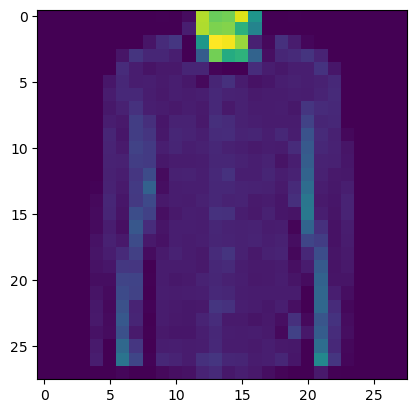

In [5]:
# Looking over the first register
plt.imshow(train_images[33])
plt.show()

### Data Cleaaning Process

Let's perform a laundry services over the dataset & look for any inconsistency, null values and son on:
* Pixel scale start from 1 to 255 RGB-scaled.
* The goal is to standarize the all values and left them from 0 to 1 on decimal way in order to make smoothier processing for the Neural-Network.

In [6]:
# Let's rescale the values
# For Train images
train_images = train_images.astype('float32') / 255
# For Test Images
test_images = test_images.astype('float32') / 255

* Now! towards Train Images lets perfom a reshape over one channel "gray-scale"

In [7]:
# Reshaping on Train Images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
# Reshaping on Test Images
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

* Now! let's perform data cleaning towards the labels
* Invoke to_Categorical in order to standarize the data accoding to "data's dimension" and set it up from 0 to 1 along with the values quantity that it got so:

In [8]:
# On Train Labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
# On Test Labels
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

### Data Model

In [9]:
#
model = tf.keras.Sequential()
# Adding Convolution Layer
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
# Let's stack the remaining Model Layers (MaxPooling) for Deepness
model.add(MaxPooling2D(pool_size=2))
# Let's add a layer to reduce the overfitting
model.add(Dropout(0.3))
# The model will recieved the input shape from its predecesor layer.
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
# Let's add a layer to keep avoiding the overfitting
model.add(Dropout(0.3))
# Let's add a new layer flatten the Matrix or Tensor 
model.add(Flatten())
# Let's stack-up Dense Layers
model.add(Dense(256, activation = 'relu'))
# Let's add a layer to keep avoiding the overfitting at 50 %
model.add(Dropout(0.5))
# Let's classify on 10 possible outcomes
model.add(Dense(10, activation = 'softmax'))
# Let's get a Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                        

### Training Model

In [10]:
# Let's compile receiving the loss function. Useful for backprogragation
model.compile(loss='categorical_crossentropy',
              # Optimizer
              optimizer = 'rmsprop',
              # To optimize & calculate the backpropagation weights
              metrics = ['accuracy']
             )

* Let's perform the training procedure:

In [11]:
# Training Model Process
model.fit(train_images, train_labels, batch_size=64, epochs=20)

Epoch 1/20


2023-03-14 17:11:57.308797: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 12s 5ms/step - loss: 0.5190 - accuracy: 0.8149
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.3419 - accuracy: 0.8775
Epoch 3/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3028 - accuracy: 0.8915
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2797 - accuracy: 0.9003
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2716 - accuracy: 0.9042
Epoch 6/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2605 - accuracy: 0.9075
Epoch 7/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2574 - accuracy: 0.9099
Epoch 8/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2563 - accuracy: 0.9108
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2502 - accuracy: 0.9131
Epoch 10/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2505 - accuracy: 0.9120
Epoch 11/

In [12]:
# Model Evaluation
model.evaluate(test_images, test_labels, verbose = 0)

[0.24433253705501556, 0.9143999814987183]

##### Outcomes:
1. 90 % accuracy on Training Test

The training set has never been observed by the Neural Network, either way, the model knowns how to classify amog 10 image categories with a 90 % accuracy and went just through 20 epochs. 